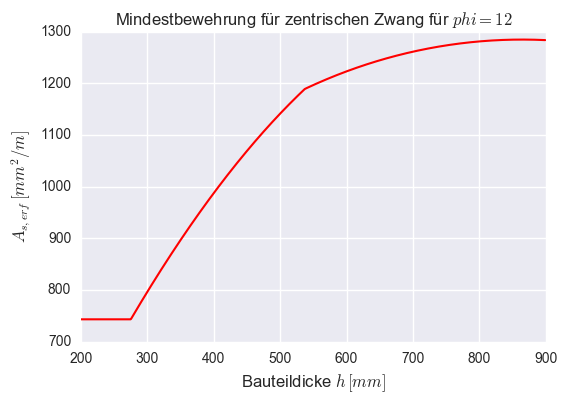

In [2]:
import numpy as np
from decimal import Decimal
from itertools import repeat
import matplotlib.pyplot as plt
from mpldatacursor import datacursor 
import seaborn
%matplotlib inline

h = np.arange(200, 900, 1)
b = 1000
c = 50.0
phi = 12.0
f_ctm = 2.6
f_cteff = 0.3 * f_ctm

d_1 = c + (phi / 2)
d = h - d_1
E_cm = 31000
E_s = 200000
A_ceff = 2.5 * (h - d) * b
k_bet = 0.85
k_c = 1
k = 0.65 + (1 - 0.65) / (800 - 300) * (800 - h)
A_ct = b * h / 2
w_k = 0.2
F_s = A_ct * f_cteff * k * k_c
F_cr = A_ceff * f_cteff

A = list(map(lambda x: (phi * 4 * d_1 * f_cteff * b / (b * x / 2 * f_cteff * (0.65 + (1 - 0.65) / 
                                                              (800 - 300) * (800 - x)) * k_c)), h))
# An alternative way to calculate A:
# A = [phi * 4 * d_1 * f_cteff * b / (b * x / 2 * f_cteff * (0.65 + (1 - 0.65) / (800 - 300) * (800 - x)) * k_c) for x in h]
# A_ = [float(Decimal("%.2f" % e)) for e in A]

B = list(repeat(phi, len(h)))

phi_grenz = list(min(A[x], B[x]) for x in range(len(h)))

sigma_s = [np.sqrt(6 * w_k * f_cteff * E_s / phi_grenz[x]) for x in range(len(h))]
#sigma_s =  [float(Decimal("%.2f" % e)) for e in sigma_s_]

as_erf_Fcr = F_cr / sigma_s * k_bet

as_erf_Fs = F_s / sigma_s * k_bet

as_erf = list(max(as_erf_Fcr[x], as_erf_Fs[x]) for x in range(len(h)))

as_phi = phi**2 * np.pi / 4

e = list((as_phi / as_erf[x] * 1000) for x in range(len(h)))

'''
#print(d)
print(h)
#print(A_ct)
print(A_)
#print(B_)
#print(phi_grenz)
print(sigma_s)
print(as_erf_Fcr)
print(as_erf_Fs)
print(as_erf)
print(e)
'''

plt.figure(num=1, dpi=125, edgecolor='b')
#fig = plt.gcf()
#fig.canvas.set_window_title('Support Resistance')
plt.plot(h, as_erf, 'r-', lw=1.5)
plt.title('Mindestbewehrung für zentrischen Zwang für $phi = {:.0f}$'.format(phi))
plt.ylabel('$A_{s,erf}\,[mm^2/m]$', fontsize=12)
plt.xlabel('Bauteildicke $h\,[mm]$', fontsize=12)
datacursor(display='multiple', draggable=True)
plt.show()